<a href="https://colab.research.google.com/github/bluecityisu/class2022/blob/main/spoon_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [13]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/class/content2/spoon_sciss/pic',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=2,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')




Found 46 images belonging to 3 classes.


In [14]:
history = model.fit(
      train_generator,
      epochs=15)

Epoch 1/15
23/23 [==============================] - 3s 81ms/step - loss: 1.3741 - acc: 0.4783
Epoch 2/15
23/23 [==============================] - 1s 55ms/step - loss: 1.1757 - acc: 0.4783
Epoch 3/15
23/23 [==============================] - 1s 61ms/step - loss: 0.9939 - acc: 0.5870
Epoch 4/15
23/23 [==============================] - 1s 56ms/step - loss: 0.7868 - acc: 0.6522
Epoch 5/15
23/23 [==============================] - 1s 55ms/step - loss: 0.8059 - acc: 0.6087
Epoch 6/15
23/23 [==============================] - 1s 59ms/step - loss: 1.2675 - acc: 0.5870
Epoch 7/15
23/23 [==============================] - 1s 61ms/step - loss: 0.7609 - acc: 0.6957
Epoch 8/15
23/23 [==============================] - 2s 90ms/step - loss: 0.6483 - acc: 0.6957
Epoch 9/15
23/23 [==============================] - 2s 91ms/step - loss: 0.8061 - acc: 0.6957
Epoch 10/15
23/23 [==============================] - 1s 61ms/step - loss: 0.7234 - acc: 0.7174
Epoch 11/15
23/23 [==============================] - 1s 59m

1/1 [==============================] - 0s 50ms/step
[[0.996 0.004 0.   ]]
0


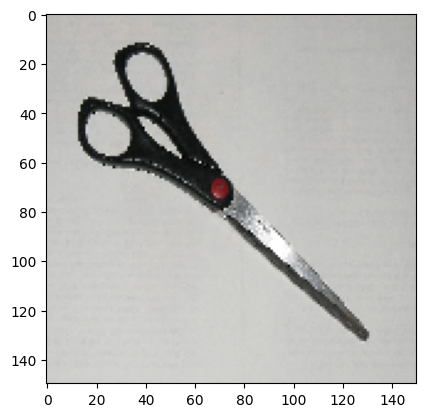

In [17]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img_height=150
img_width=150

img_path=r'/content/1145px-Scissor.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_tensor = image.img_to_array(img)
img_tensor1 = np.expand_dims(img_tensor, axis=0)
img_tensor1 = img_tensor1/255.0
img_tensor2 = np.vstack([img_tensor1])

featuremap = model.predict(img_tensor2)
plt.imshow(img)
print(np.around(featuremap,3))
print(featuremap.argmax())